In [2]:
#JaiShreeRam

import pandas as pd
df = pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.fillna(df.mean(), inplace=True)

<ipython-input-5-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


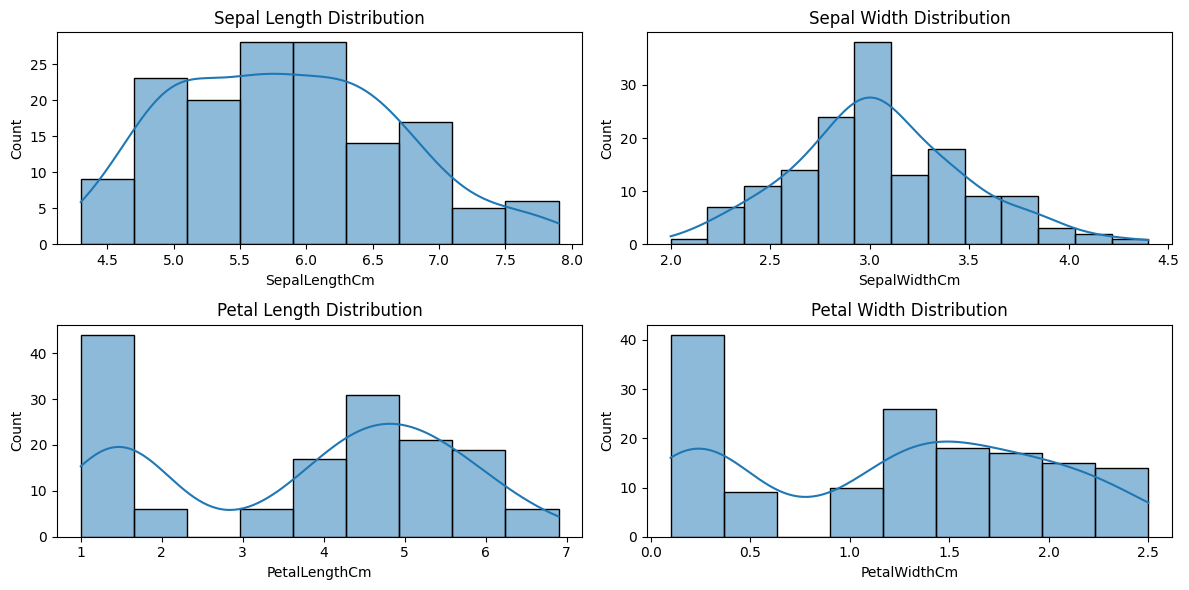

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['SepalLengthCm'], kde=True)
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['SepalWidthCm'], kde=True)
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['PetalLengthCm'], kde=True)
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['PetalWidthCm'], kde=True)
plt.title('Petal Width Distribution')

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

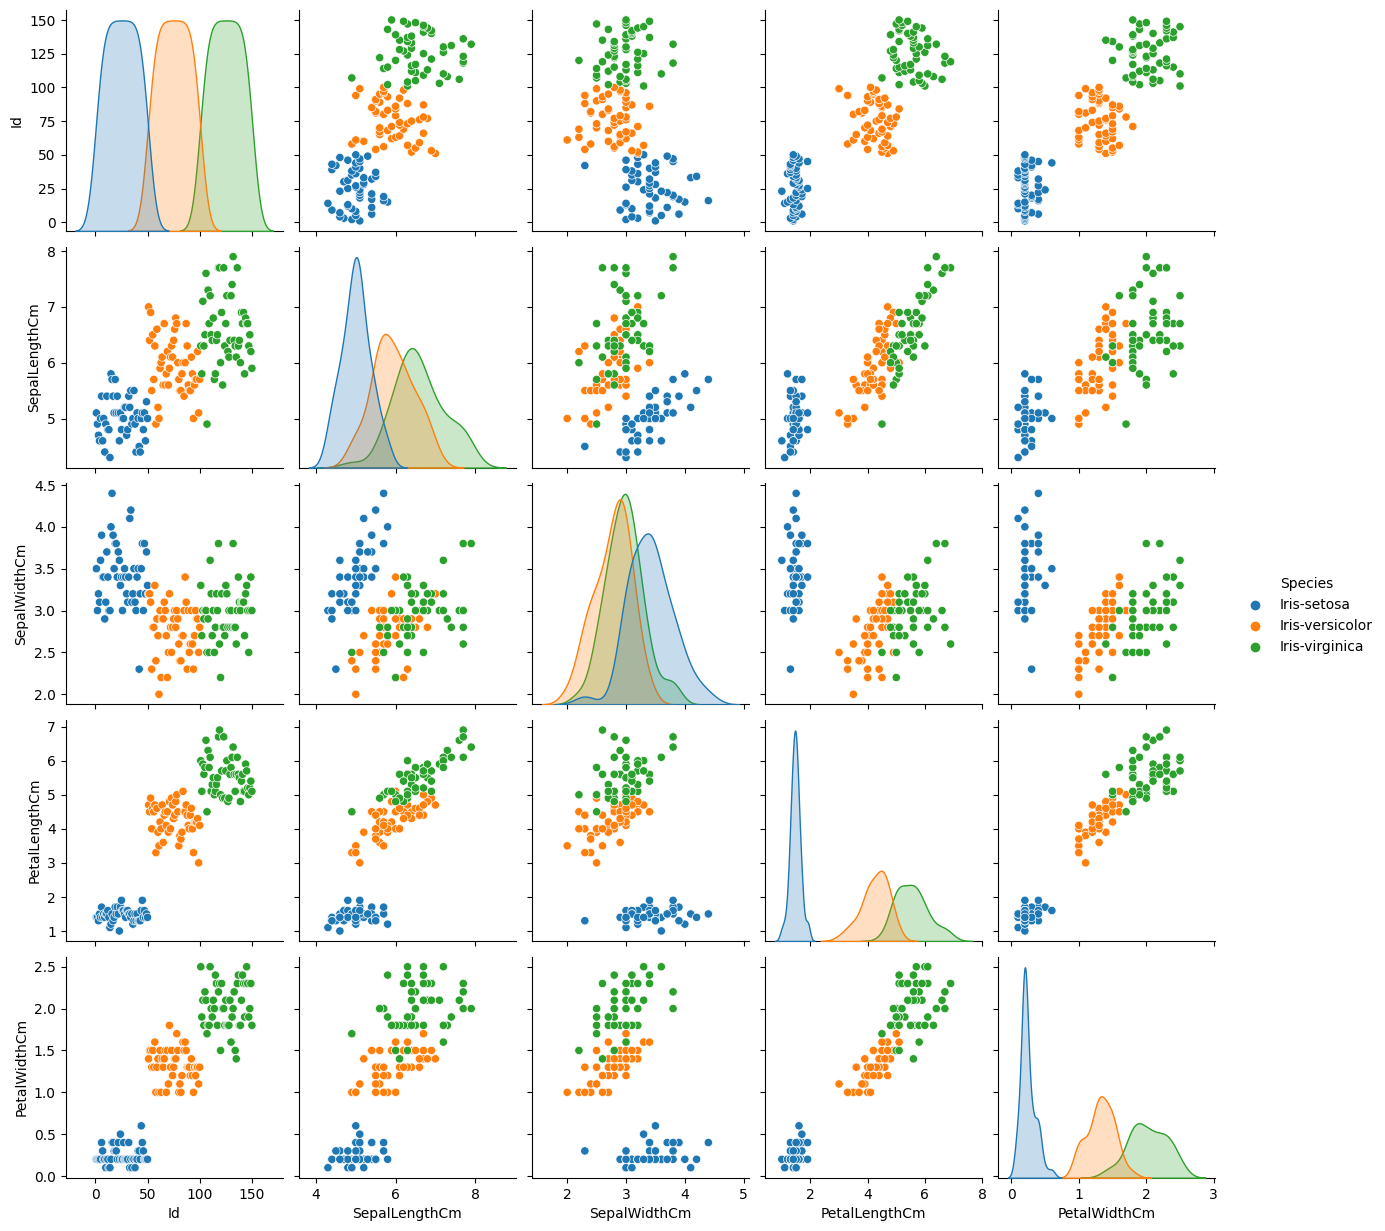

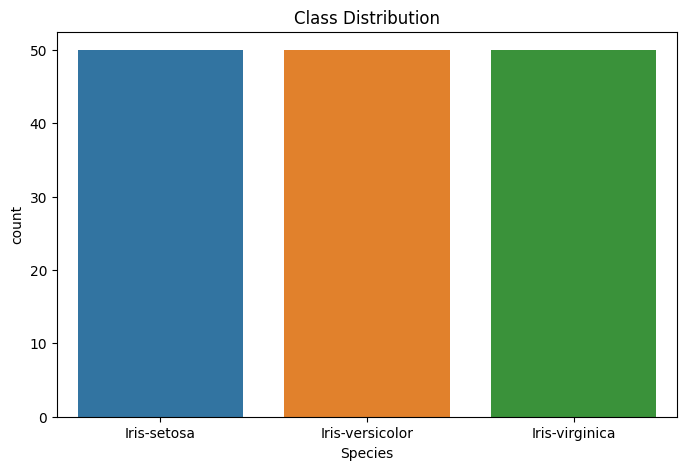

In [7]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Species')
plt.show()


plt.figure(figsize=(8, 5))
sns.countplot(x='Species', data=df)
plt.title('Class Distribution')
plt.show()


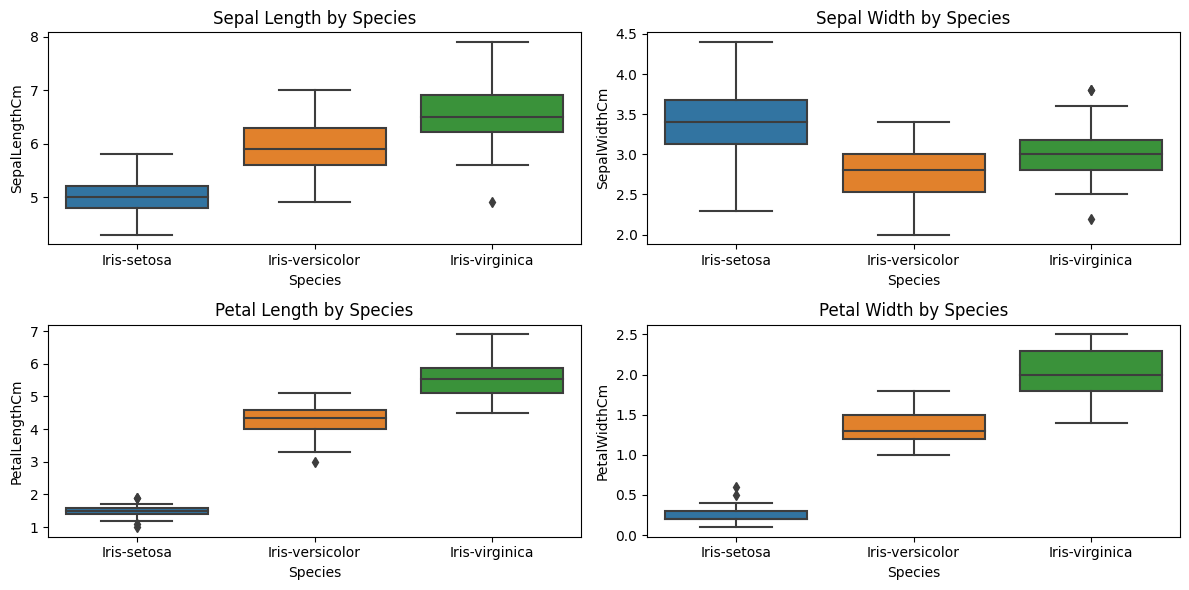

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length by Species')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width by Species')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length by Species')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()

<ipython-input-9-01b9b8f0fb69>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


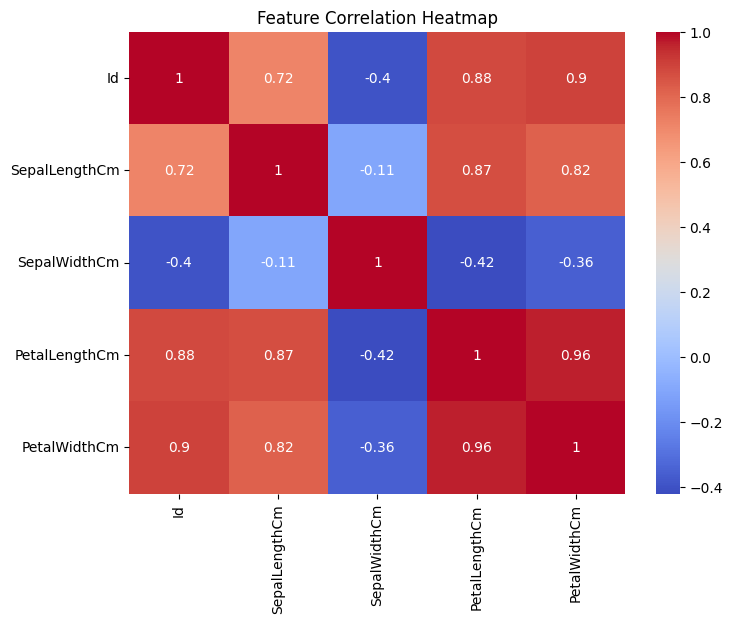

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
# Assuming 'new_data' is a DataFrame
df.drop(df.columns[0], axis=1, inplace=True)


In [11]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Model 1: Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Model 2: Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Model 3: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)




SVC(kernel='linear')

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate Logistic Regression
logistic_predictions = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)

print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1-Score:", logistic_f1)
print("Confusion Matrix:")
print(logistic_confusion_matrix)

# Evaluate Decision Tree
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)

print("\nDecision Tree Metrics:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1-Score:", decision_tree_f1)
print("Confusion Matrix:")
print(decision_tree_confusion_matrix)

# Evaluate SVM
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

print("\nSVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)
print("Confusion Matrix:")
print(svm_confusion_matrix)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Decision Tree Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

SVM Metrics:
Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-Score: 0.9777448559670783
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [15]:
from sklearn.model_selection import GridSearchCV



#Logistic Regression
logistic_param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 1000, 10000]
}

#Decision Tree
decision_tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

#SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3, 4, 5]
}



#Tune Logistic Regression
tuned_logistic_model = GridSearchCV(LogisticRegression(), logistic_param_grid, cv=5)
tuned_logistic_model.fit(X_train, y_train)

#Tune Decision Tree
tuned_decision_tree_model = GridSearchCV(DecisionTreeClassifier(), decision_tree_param_grid, cv=5)
tuned_decision_tree_model.fit(X_train, y_train)

#Tune SVM
tuned_svm_model = GridSearchCV(SVC(), svm_param_grid, cv=5)
tuned_svm_model.fit(X_train, y_train)


print("Best Hyperparameters for Logistic Regression:", tuned_logistic_model.best_params_)
print("Best Hyperparameters for Decision Tree:", tuned_decision_tree_model.best_params_)
print("Best Hyperparameters for SVM:", tuned_svm_model.best_params_)


Best Hyperparameters for Logistic Regression: {'C': 1, 'max_iter': 100}
Best Hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Best Hyperparameters for SVM: {'C': 10, 'degree': 3, 'kernel': 'linear'}


In [16]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Tuned SVM': tuned_svm_model
}


accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}


for model_name, model in models.items():
    predictions = model.predict(X_test)

    accuracy_scores[model_name] = accuracy_score(y_test, predictions)
    precision_scores[model_name] = precision_score(y_test, predictions, average='weighted')
    recall_scores[model_name] = recall_score(y_test, predictions, average='weighted')
    f1_scores[model_name] = f1_score(y_test, predictions, average='weighted')


for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_scores[model_name]}")
    print(f"Precision: {precision_scores[model_name]}")
    print(f"Recall: {recall_scores[model_name]}")
    print(f"F1-Score: {f1_scores[model_name]}")
    print("")


best_model = max(f1_scores, key=f1_scores.get)
print(f"The best model based on F1-Score is: {best_model}")


Model: Logistic Regression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Model: Decision Tree
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

Model: Tuned SVM
Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1-Score: 0.9777448559670783

The best model based on F1-Score is: Logistic Regression


In [28]:
from sklearn.linear_model import LogisticRegression


best_logistic_model = LogisticRegression(C=0.001, penalty='l2')


best_logistic_model.fit(X_train, y_train)


LogisticRegression(C=0.001)

In [29]:
# Make predictions on the test data
logistic_predictions = best_logistic_model.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, logistic_predictions)
precision = precision_score(y_test, logistic_predictions, average='weighted')
recall = recall_score(y_test, logistic_predictions, average='weighted')
f1 = f1_score(y_test, logistic_predictions, average='weighted')
confusion_matrix_result = confusion_matrix(y_test, logistic_predictions)

print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion_matrix_result)


Logistic Regression Metrics:
Accuracy: 0.7111111111111111
Precision: 0.7455026455026456
Recall: 0.7111111111111111
F1-Score: 0.7047680556631963
Confusion Matrix:
[[14  5  0]
 [ 0  5  8]
 [ 0  0 13]]


In [32]:
new_data = [[6.2, 2.8, 4.8, 1.8]]

predicted_species = best_logistic_model.predict(new_data)

print("Predicted Species:", predicted_species)


Predicted Species: ['Iris-virginica']
